# Gaussian Process Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics.pairwise import rbf_kernel

## Generate synthesis data

We generate some non-linear synthetic data from a complex function

In [4]:
# Generate random input from 1 to 20
# and sort the input
x = np.random.uniform(low=-10, high=10, size=30)
x = np.sort(x)
# Create labels from the input using a random curve function
y = np.sin(x) + 0.05 * (x ** 2) - 2

In [5]:
# Split the data into two set, train and test data
x_train, x_test, y_train, y_test = x[:15], x[15:], y[:15], y[15:]

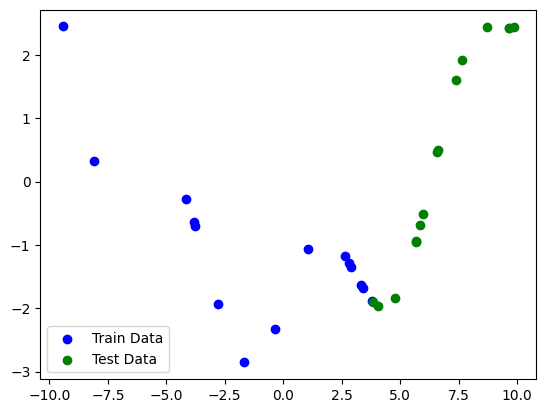

In [9]:
# Visualize the data point
plt.scatter(x_train, y_train, label='Train Data', color='blue')
plt.scatter(x_test, y_test, label='Test Data', color='green')
plt.legend()
plt.show()

## Gaussian Process Implementation

In this section, we implement a simple Gaussian Process model for regression.

In [21]:
def gaussian_process_regression(X, Y, noise_var, gamma, test_points):
    """
    Calculate the Gaussian Process prediction
    :param X: inputs
    :param y: targets
    :param noise_var: noise level
    :param test_point: test input
    :return: mean and variance of the prediction
    """
    # Calculate the covariance matrix
    K = rbf_kernel(X.reshape(-1, 1), gamma=gamma)

    # Perform Cholesky factorization of K + noise_var * I
    L = np.linalg.cholesky(K + noise_var * np.eye(K.shape[0]))

    # Calculate alpha
    beta = scipy.linalg.solve_triangular(L, Y, lower=True)
    alpha = scipy.linalg.solve_triangular(L.T, beta, lower=False)

    # Calculate the mean and variance of each test points
    means = []
    vars = []
    for test_point in test_points:
        k_star = rbf_kernel(np.array([test_point]).reshape(-1, 1), X.reshape(-1, 1), gamma=gamma).reshape(-1)
        mean_f = np.dot(k_star, alpha)

        # Calculate the variance
        v = scipy.linalg.solve_triangular(L, k_star.reshape(-1), lower=True)
        var_f = (rbf_kernel(np.array([test_point]).reshape(-1, 1), np.array([test_point]).reshape(-1, 1), gamma=gamma)
                 - np.dot(v, v))[0][0]

        # Append to the mean and variance
        means.append(mean_f)
        vars.append(var_f)

    # Return the mean and variance
    return np.array(means), np.array(vars)

Next, we run the code to get the prediction for the train and test set

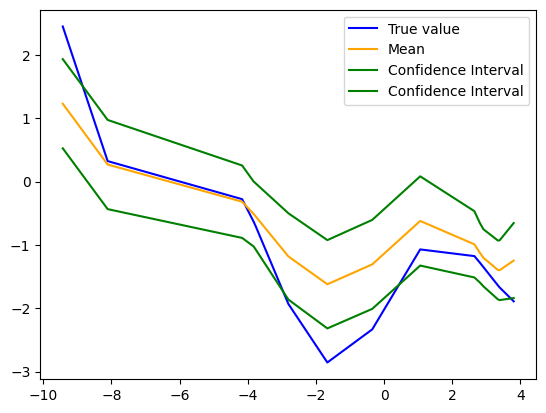

In [22]:
# For the train set
mean_f, var_f = gaussian_process_regression(x_train, y_train, 1, 1, x_train)
# Draw the training points, means and variances
plt.plot(x_train, y_train, color='blue', label='True value')
plt.plot(x_train, mean_f, color='orange', label='Mean')
plt.plot(x_train, mean_f - np.sqrt(var_f), color='green', label='Confidence Interval')
plt.plot(x_train, mean_f + np.sqrt(var_f), color='green', label='Confidence Interval')
plt.legend()
plt.show()

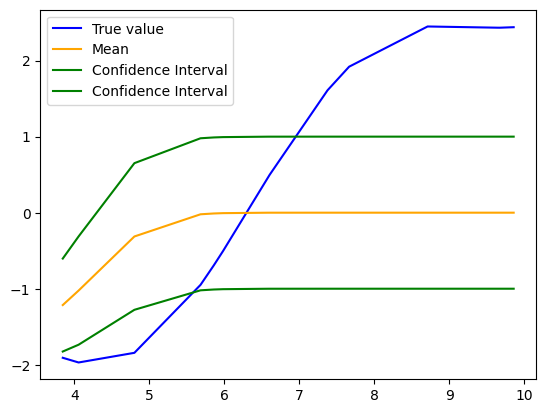

In [23]:
# For the test set
mean_f, var_f = gaussian_process_regression(x_train, y_train, 1, 1, x_test)
# Draw the training points, means and variances
plt.plot(x_test, y_test, color='blue', label='True value')
plt.plot(x_test, mean_f, color='orange', label='Mean')
plt.plot(x_test, mean_f - np.sqrt(var_f), color='green', label='Confidence Interval')
plt.plot(x_test, mean_f + np.sqrt(var_f), color='green', label='Confidence Interval')
plt.legend()
plt.show()